In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [146]:
df.shape

(545, 13)

# Create simple model linear regression x=area, y=price

In [147]:
# Create simple model linear regression x=area, y=price
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

def predict(w0, w1, x):
    return w0 + w1 * x

class Linear_Regression_simple:
    def __init__(self, lr: float = 0.001, thr: float = 0.0001, n_epochs: int = 100):
        self.lr = lr
        self.thr = thr
        self.n_epochs = n_epochs
        self.w = np.array([random.uniform(1, 3), random.uniform(0, 1)])
        print(f"Init w:{self.w}")
        
    def predict(self, X: np.ndarray) -> list:
        return X @ self.w
                           
    def update_w(self, X: np.array, y: np.array):
        m = len(y)
        h = self.predict(X)
        self.w -= self.lr / m * X.T @ (h - y)

    
    def fit(self, X: np.array, y: np.array):
        last_cost = 1000
        for i in range(self.n_epochs):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
#             print(f"{i}, {self.w}, {new_cost}")
            if abs(last_cost - new_cost) < self.thr:
                return self.w, new_cost
            last_cost = new_cost
        return self.w, new_co

In [148]:
#Normalize data because with origin data the series does not converge
y = np.array(df[["price"]]).reshape(-1)/np.full((X.shape[0],), 1000000)
X = np.array(df[["area"]])/np.full((X.shape[0], 1), 1000)
X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)

In [94]:
lin_regression = Linear_Regression_simple(lr=0.03, n_epochs=600, thr=0.00001)
res_simple = lin_regression.fit(X, y)

Init w:[2.26889556 0.47072685]


In [95]:
print(f"Result of simple regression: [w0, w1] ={res_simple[0]}, cost={res_simple[1]}")
# Best result after 10 runs:[w0, w1] = [2.49966218 0.4427411 ] cost= 1.2453885183419742
# often have results with cost= 1.26-1.28 and not converge after 600 cycles like that:
# [w0, w1] = [1.86759528 0.54809445] cost=1.2647623639196355


Result of simple regression: [w0, w1] =[2.27218018 0.48105176], cost=1.2454284196312542


In [96]:
# verification of calculations via sklearn
regressor = LinearRegression()
regressor.fit(X, y)
print(f"Result of sklearn regression:[w0, w1]= [{regressor.intercept_}, {regressor.coef_[1]}], cost = {cost(y, regressor.predict(X))}")


Result of sklearn regression:[w0, w1]= [2.3873084823964343, 0.4619748942727835], cost = 1.2444306990903287


In [97]:
print("Сompare the values of simple and sklearn regression")
dif_w = [(res_simple[0][0] - regressor.intercept_).round(4),(res_simple[0][1] - regressor.coef_[1]).round(4)]
dif_cost = (res_simple[1] - cost(y, regressor.predict(X))).round(4)
print(f"[w0, w1]: {res_simple[0]} and [{regressor.intercept_}, {regressor.coef_[1]}], dif = {dif_w}")
print(f"cost: {res_simple[1]} and {cost(y, regressor.predict(X))}, dif = {dif_cost}")
print("The results are similar")

Сompare the values of simple and sklearn regression
[w0, w1]: [2.27218018 0.48105176] and [2.3873084823964343, 0.4619748942727835], dif = [-0.1151, 0.0191]
cost: 1.2454284196312542 and 1.2444306990903287, dif = 0.001
The results are similar


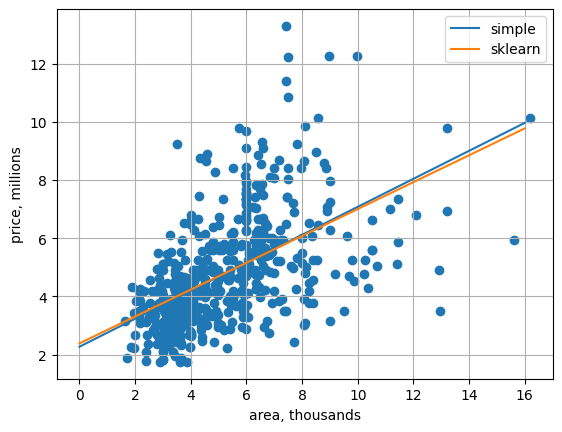

In [98]:
X_ = X[:,1]
plt.scatter(X_.reshape(-1), y)
plt.plot([0, 16], [predict(res_simple[0][0], res_simple[0][1], i) for i in [0, 16]], label="simple")
plt.plot([0, 16], [predict(regressor.intercept_, regressor.coef_[1], i) for i in [0, 16]], label="sklearn")
plt.ylabel("price, millions")
plt.xlabel("area, thousands")
plt.legend()
plt.grid()

# Create function of vector prediction, function of cost, one step regression

In [136]:
# features: area, number of bedrooms, number of bathrooms
w = np.array([2.5, 0.45, 0.5, 0.5])
X = np.array(df[["area", "bedrooms", "bathrooms"]])
X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
y = np.array(df[["price"]]).reshape(-1)

def vector_prediction(X: np.array, w: np.array):
    return X @ w

def vector_cost(y: np.array, h: np.array):
    return np.mean(abs(h - y))

def update_vector_w(w: np.array, X: np.array, y: np.array, lr=0.01):
    m = len(y)
    h = vector_prediction(X, w)
    return w - lr / m * X.T @ (h - y)
p_cost = vector_cost(y, vector_prediction(X, w))
new_w = update_vector_w(w, X, y)
new_cost = vector_cost(y, vector_prediction(X, new_w))
print(f"New values w: {new_w} and new cost = {new_cost.round(4)} > {p_cost.round(4)}")
print("With origin data the series does not converge because new cost value higher than previous one")http://localhost:8888/notebooks/Hw3.ipynb#Make-Linear-Regression-via-sklearn

New values w: [4.76465688e+04 2.67088430e+08 1.46320805e+05 6.61363542e+04] and new cost = 1375645786053.7751 > 4764406.8784
With origin data the series does not converge because new cost value higher than previous one


# Make Linear Regression via sklearn

In [26]:
def cost(y: np.array, h: np.array) -> float:
    return np.mean((h - y) ** 2) / 2

y = np.array(df[["price"]]).reshape(-1)
X = np.array(df[["area", "bedrooms", "bathrooms"]])
regressor = LinearRegression()
regressor.fit(X, y)
list_w = [regressor.intercept_.tolist()]
list_w.extend(regressor.coef_.tolist())
print(f"Result of sklearn regression:[w0, w1, w2, w3] = {list_w}")
print(f"Cost = {cost(y, regressor.predict(X))}")

Result of sklearn regression:[w0, w1, w2, w3] = [-173171.60763263702, 378.7627535851045, 406820.03376918146, 1386049.497790998]
Cost = 895585024988.6597


# Analytical solution

In [33]:
X = np.array(df[["area", "bedrooms", "bathrooms"]])
X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
y = np.array(df[["price"]]).reshape(-1)
w = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Result of analytical solution:[w0, w1, w2, w3] = {w}")

Result of analytical solution:[w0, w1, w2, w3] = [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


# Conclusions

In [37]:
#Analytical solution and Linear Regression via sklearn through the same result
print("Divergence via function 'cost' = ", cost(w, list_w))

Divergence via function 'cost' =  3.6602411879461307e-19
